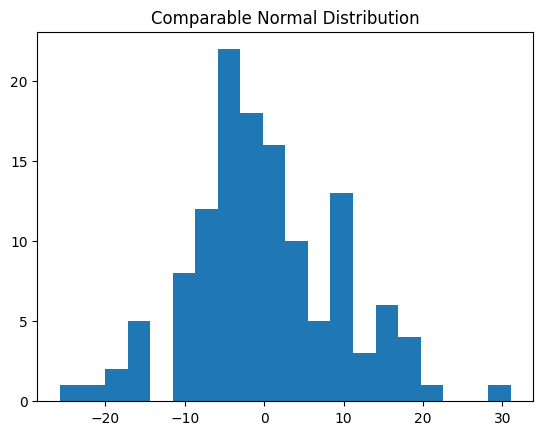

In [1]:
# Generate graph of normal dist
import numpy as np
import matplotlib.pyplot as plt

Z_LAYER_SIZE = 128

real_dist = 10 * np.random.randn(1, Z_LAYER_SIZE)
plt.hist(real_dist[0], bins=20)
plt.title("Comparable Normal Distribution")
plt.show()

31
74
91


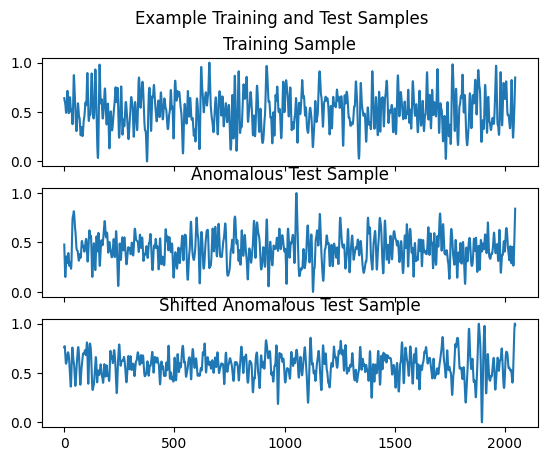

In [2]:
# Display different signals
from pickle import load

x_tests, y_tests = load(open("data/test_%s.pickle" % 2048, "rb"))
x_train = load(open("data/train_%s.pickle" % 2048, "rb"))

fig, ax = plt.subplots(nrows=3, sharex="col")
ax[0].plot(x_train[0])
ax[0].set_title("Training Sample")

waves = [x for x, y in zip(x_tests[0], y_tests[0]) if y == (0, 1)]
for i, x in enumerate(waves):
    if abs(x.index(1) - 1024) < 128 and abs(x.index(0) - 1024) < 128:
        print(i)

ax[1].plot(waves[91])
ax[1].set_title("Anomalous Test Sample")

ax[2].plot(waves[60])
ax[2].set_title("Shifted Anomalous Test Sample")

fig.suptitle("Example Training and Test Samples")
fig.show()

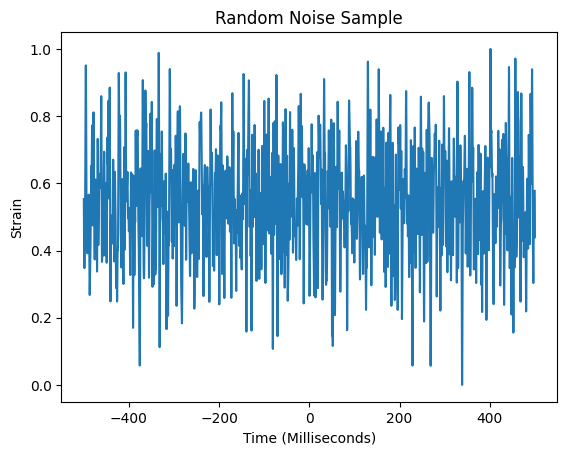

In [3]:
# Display training sample

x_train = load(open("data/train_%s.pickle" % 4096, "rb"))

plt.plot([(v - (0.5 * len(x_train[0])))/4.096 for v in range(len(x_train[0]))], x_train[0])
plt.title("Random Noise Sample")
plt.xlabel("Time (Milliseconds)")
plt.ylabel("Strain")
plt.show()

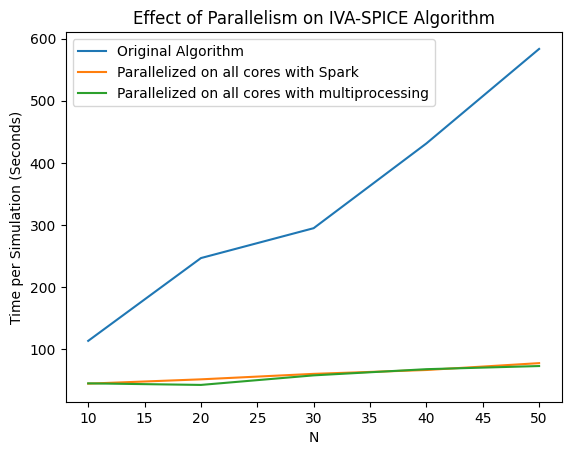

In [4]:
# Parallelizing the IVA Spice Thing

spark = [221.99/5, 256.70/5, 300.82/5, 331.90/5, 387.12/5]
pythonic = [224.44/5, 211.77/5, 288.73/5, 338.48/5, 363.81/5]
original = [566.44/5, 1232.96/5, 1473.58/5, 2155.74/5, 2916.70/5]
Ns = [10, 20, 30, 40, 50]

plt.plot(Ns, original, label="Original Algorithm")
plt.plot(Ns, spark, label="Parallelized on all cores with Spark")
plt.plot(Ns, pythonic, label="Parallelized on all cores with multiprocessing")

plt.title("Effect of Parallelism on IVA-SPICE Algorithm")
plt.xlabel("N")
plt.ylabel("Time per Simulation (Seconds)")
plt.legend()

plt.show()

In [9]:
# Show test distribution
import numpy as np

x_tests, y_tests = load(open("data/test_4096.pickle", "rb"))
x_tests = [[x - 0.5 for x in sample] for sample in x_tests[0]]
y_tests = y_tests[0]

y_tests = np.array(y_tests)
print(y_tests[y_tests == (1, 0)].shape)
print(y_tests[y_tests == (0, 1)].shape)

(300,)
(300,)


In [11]:
x_train = load(open("data/train_4096.pickle", "rb"))
x_train = [[x - 0.5 for x in sample] for sample in x_train]
np.array(x_train).shape

(10000, 4096)